In [1451]:

# !pip install scipy==1.9.3
# !pip install mealpy

In [1452]:
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from mealpy.swarm_based.GWO import OriginalGWO
from mealpy.utils.problem import Problem, BinaryVar
from mealpy.utils.problem import Problem
from mealpy.swarm_based import GWO
import numpy as np
from sklearn.metrics import accuracy_score
import os

In [1453]:
data = pd.read_csv("cancer patient data sets.csv")

In [1454]:
data['Level'] = data['Level'].map({'Low': 0, 'Medium': 1, "High": 2})
data = data.drop("Patient Id", axis=1)
data = data.drop("index", axis=1)

In [1455]:
data.head(5)

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


In [1456]:
data.tail(5)

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,2
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,2
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2
999,47,1,6,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2


In [1457]:
data.dtypes

Age                         int64
Gender                      int64
Air Pollution               int64
Alcohol use                 int64
Dust Allergy                int64
OccuPational Hazards        int64
Genetic Risk                int64
chronic Lung Disease        int64
Balanced Diet               int64
Obesity                     int64
Smoking                     int64
Passive Smoker              int64
Chest Pain                  int64
Coughing of Blood           int64
Fatigue                     int64
Weight Loss                 int64
Shortness of Breath         int64
Wheezing                    int64
Swallowing Difficulty       int64
Clubbing of Finger Nails    int64
Frequent Cold               int64
Dry Cough                   int64
Snoring                     int64
Level                       int64
dtype: object

In [1458]:
data

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,2
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,2
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


In [1459]:
y= data["Level"]
X= data.drop(["Level"],axis= 1)

In [1460]:
# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1461]:
scaler = StandardScaler()

In [1462]:
scaler.fit(X_train)

StandardScaler()

In [1463]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [1464]:
model_all = GaussianNB()
model_all.fit(X_train, y_train)
y_pred_all = model_all.predict(X_test)
y_prob_all = model_all.predict_proba(X_test)
acc_all = accuracy_score(y_test, y_pred_all)

In [1465]:
print("\n===Naive Bayes ===")
print("Akurasi:", accuracy_score(y_test, y_pred_all))
print(classification_report(y_test, y_pred_all, digits=4))


===Naive Bayes ===
Akurasi: 0.895
              precision    recall  f1-score   support

           0     1.0000    0.8545    0.9216        55
           1     0.8548    0.8413    0.8480        63
           2     0.8681    0.9634    0.9133        82

    accuracy                         0.8950       200
   macro avg     0.9077    0.8864    0.8943       200
weighted avg     0.9002    0.8950    0.8950       200



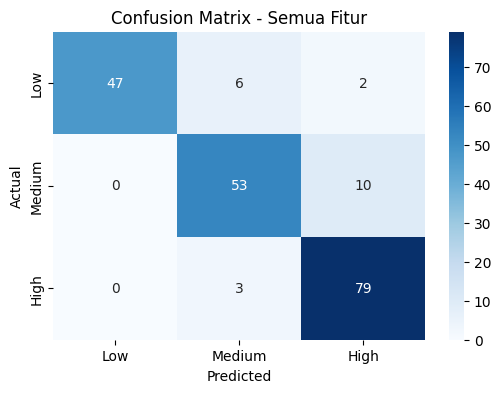

In [1466]:
# Confusion Matrix
def plot_confusion_matrix(true_y, pred_y, title):
    C = confusion_matrix(true_y, pred_y)
    labels = ['Low', 'Medium', 'High']  # Sesuaikan label
    plt.figure(figsize=(6, 4))
    sns.heatmap(C, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred_all, "Confusion Matrix - Semua Fitur")

In [1467]:
print(f"✅ Akurasi (Semua Fitur): {acc_all:.4f}")

✅ Akurasi (Semua Fitur): 0.8950


In [1468]:
class FeatureSelectionProblem(Problem):
    def __init__(self, X, y):
        # Simpan nama kolom kalau X DataFrame
        if isinstance(X, pd.DataFrame):
            self.feature_names = X.columns.tolist()
            self.X = X.values
        else:
            self.feature_names = [f"f{i}" for i in range(X.shape[1])]
            self.X = X

        self.y = y
        dim = self.X.shape[1]
        bounds = [BinaryVar() for _ in range(dim)]
        super().__init__(bounds=bounds, minmax="min")

    def obj_func(self, solution):
        selected = [i for i, bit in enumerate(solution) if bit > 0.5]
        if len(selected) == 0:
            return 1.0
        X_sel = self.X[:, selected]
        model = GaussianNB()
        model.fit(X_sel, self.y)
        acc = model.score(X_sel, self.y)
        return 1 - acc


In [1469]:
# Ambil semua nama kolom kecuali target
feature_names = [col for col in X.columns if col != 'Target']

# Buat DataFrame train/test hanya dengan fitur (tanpa target)
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# Jalankan GWO untuk seleksi fitur
problem_gwo = FeatureSelectionProblem(X_train_df, y_train)
model_gwo = GWO.OriginalGWO(epoch=30, pop_size=20)
best_gwo = model_gwo.solve(problem_gwo)

# Ambil index fitur terpilih dari solusi GWO (1 = terpilih)
selected_gwo_idx = [i for i, bit in enumerate(best_gwo.solution) if bit > 0.5]

# Ambil nama fitur sesuai index
selected_gwo_features = [feature_names[i] for i in selected_gwo_idx]

# Batasi hanya 10 fitur teratas
selected_gwo_features = selected_gwo_features[:10]

print("Jumlah fitur terpilih:", len(selected_gwo_features))
print("Fitur terpilih:", selected_gwo_features)


2025/08/17 03:13:51 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: OriginalGWO(epoch=30, pop_size=20)
2025/08/17 03:13:51 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 1, Current best: 0.05125000000000002, Global best: 0.05125000000000002, Runtime: 0.02330 seconds
2025/08/17 03:13:51 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 2, Current best: 0.05125000000000002, Global best: 0.05125000000000002, Runtime: 0.02710 seconds
2025/08/17 03:13:51 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 3, Current best: 0.04125000000000001, Global best: 0.04125000000000001, Runtime: 0.02746 seconds
2025/08/17 03:13:51 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 4, Current best: 0.03125, Global best: 0.03125, Runtime: 0.04367 seconds
2025/08/17 03:13:51 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 5, Current best: 0.03125, Global best: 0.03125, Runtime: 0.02778 seconds
2025/08/17 03:13:51 PM

Jumlah fitur terpilih: 10
Fitur terpilih: ['Age', 'Gender', 'Air Pollution', 'Obesity', 'Passive Smoker', 'Fatigue', 'Weight Loss', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails']


In [1470]:
# === Evaluasi Naive Bayes dengan fitur hasil seleksi GWO ===
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# Ambil subset fitur terpilih
X_train_gwo = X_train_df[selected_gwo_features]
X_test_gwo = X_test_df[selected_gwo_features]

model_nb_gwo = GaussianNB()
model_nb_gwo.fit(X_train_gwo, y_train)
y_pred_gwo = model_nb_gwo.predict(X_test_gwo)
y_prob_gwo = model_nb_gwo.predict_proba(X_test_gwo)
acc_gwo = accuracy_score(y_test, y_pred_gwo)

print("Akurasi Naive Bayes + GWO Feature Selection:", acc_gwo)

Akurasi Naive Bayes + GWO Feature Selection: 0.965


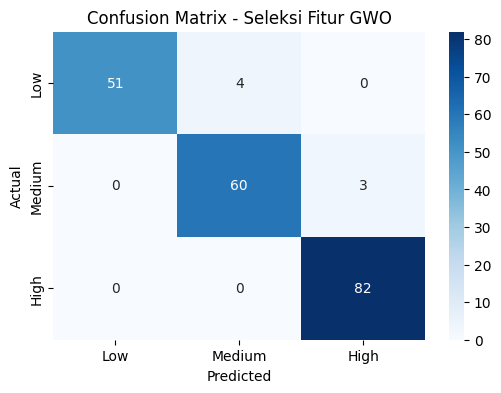

In [1471]:
plot_confusion_matrix(y_test, y_pred_gwo, "Confusion Matrix - Seleksi Fitur GWO")

In [1472]:
print("\n===Naive Bayes Dengan GWO ===")
print("Akurasi:", accuracy_score(y_test, y_pred_gwo))
print(classification_report(y_test, y_pred_gwo, digits=4))


===Naive Bayes Dengan GWO ===
Akurasi: 0.965
              precision    recall  f1-score   support

           0     1.0000    0.9273    0.9623        55
           1     0.9375    0.9524    0.9449        63
           2     0.9647    1.0000    0.9820        82

    accuracy                         0.9650       200
   macro avg     0.9674    0.9599    0.9631       200
weighted avg     0.9658    0.9650    0.9649       200



In [1473]:
print("\n📊 Perbandingan Akurasi:")
print(f"Semua Fitur            : {acc_all:.4f}")
print(f"Fitur Terpilih GWO     : {acc_gwo:.4f}")


📊 Perbandingan Akurasi:
Semua Fitur            : 0.8950
Fitur Terpilih GWO     : 0.9650


In [1474]:
import pickle

In [1475]:
# Simpan Model optimazition
pickle.dump(model_nb_gwo, open('model.pkl', 'wb'))

In [1476]:
# Buka file model.pkl
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

In [1477]:
# Melihat tipe model
print(type(model))

<class 'sklearn.naive_bayes.GaussianNB'>


In [1478]:
# Jika model adalah scikit-learn, Anda bisa melihat parameternya
print(model)

GaussianNB()


In [1479]:
# Untuk eksplorasi lebih dalam
print(dir(model))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_X', '_check_feature_names', '_check_n_features', '_estimator_type', '_get_param_names', '_get_tags', '_joint_log_likelihood', '_more_tags', '_partial_fit', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_update_mean_variance', '_validate_data', 'class_count_', 'class_prior_', 'classes_', 'epsilon_', 'feature_names_in_', 'fit', 'get_params', 'n_features_in_', 'partial_fit', 'predict', 'predict_log_proba', 'predict_proba', 'priors', 'score', 'set_params', 'sigma_', 'theta_', 'var_', 'var_smoothing']
